### Introduction 

In this project a chosen dataset will be analysed and based upon that will conclude about the findings.
The dataset chosen for this project is 'tmdb-movies'
It contains details like cast,genre, revenue,rating,etc of about 10,000 movies.
The questions asked and analysed are mentioned before their codes and observation is at the end of analysis of all the questions.
So, I will study the different properties and trends and finally conclude with what are requirements of a successful movie.


In [45]:
#importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns


In [46]:
#reading the csv file
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Data Wrangling

### General Properties

In [47]:
df.shape

(10866, 21)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [49]:
rows, cols= df.query('budget==0').shape
print('there are {} rows and {} columns with 0 budget'.format(rows,cols))

there are 5696 rows and 21 columns with 0 budget


In [50]:
rows, cols= df.query('revenue==0').shape
print('there are {} rows and {} columns with 0 revenue'.format(rows,cols))

there are 6016 rows and 21 columns with 0 revenue


In [51]:
rows, cols= df.query('runtime==0').shape
print('there are {} rows and {} columns with 0 runtime'.format(rows,cols))

there are 31 rows and 21 columns with 0 runtime


In [52]:
rows, cols= df.query('vote_count==0').shape
print('there are {} rows and {} columns with 0 vote_count'.format(rows,cols))

there are 0 rows and 21 columns with 0 vote_count


In [53]:
rows, cols= df.query('popularity==0').shape
print('there are {} rows and {} columns with 0 popularity'.format(rows,cols))

there are 0 rows and 21 columns with 0 popularity


checking for missing values

In [54]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

dropping the missing values

In [55]:
df.dropna(subset=['imdb_id','cast','director','genres','homepage','tagline','keywords','production_companies','overview'] , how='any',inplace=True)
df.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

### Data Cleaning 

check for duplicate values

In [56]:
df.duplicated().sum()

0

In [57]:
df.shape

(1992, 21)

changing release_date column into standard date format

In [58]:
df.release_date = pd.to_datetime(df['release_date'])
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


Deleting the unnecessary columns

In [59]:
col = ['id','imdb_id','homepage','overview','budget_adj','revenue_adj']
df.drop(col,axis=1,inplace=True)
df.head()

,popularity,budget,revenue,original_title,cast,director,tagline,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015


In [60]:
df.to_csv('tmdb-movies_edit.csv',index = False)

# Exploratory Data Analysis

### Question1: What are the top 10 rated movies and anayse the distribution of average movie rating.

In [63]:
df_movie = pd.read_csv('tmdb-movies_edit.csv')
df_top = df_movie.nlargest(10,'vote_average')
df_top.head()


,popularity,budget,revenue,original_title,cast,director,tagline,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
1702,5.738034,6000000,245066411,The Godfather,Marlon Brando|Al Pacino|James Caan|Richard S. ...,Francis Ford Coppola,An offer you can't refuse.,italy|love at first sight|loss of father|patri...,175,Drama|Crime,Paramount Pictures|Alfran Productions,1972-03-15,3970,8.3,1972
181,4.780419,3300000,13993093,Whiplash,Miles Teller|J.K. Simmons|Melissa Benoist|Aust...,Damien Chazelle,The road to greatness can take you to the edge.,jazz|obsession|conservatory|music teacher|new ...,105,Drama|Music,Bold Films|Blumhouse Productions|Right of Way ...,2014-10-10,2372,8.2,2014
717,0.052322,0,1339650,Bill Cunningham New York,Bill Cunningham|Tom Wolfe|Anna Wintour|Carmen ...,Richard Press,"He who seeks beauty, will find it.",fashion|milliner|new york city ballet|poncho|g...,84,Documentary,First Thought Films,2010-03-24,16,8.1,2010
719,8.947905,63000000,100853753,Fight Club,Edward Norton|Brad Pitt|Meat Loaf|Jared Leto|H...,David Fincher,How much can you know about yourself if you've...,support group|dual identity|nihilism|rage and ...,139,Drama,Regency Enterprises|Fox 2000 Pictures|Taurus F...,1999-10-14,5923,8.1,1999
762,8.466668,185000000,1001921825,The Dark Knight,Christian Bale|Michael Caine|Heath Ledger|Aaro...,Christopher Nolan,Why So Serious?,dc comics|crime fighter|secret identity|scarec...,152,Drama|Action|Crime|Thriller,DC Comics|Legendary Pictures|Warner Bros.|Syncopy,2008-07-16,8432,8.1,2008


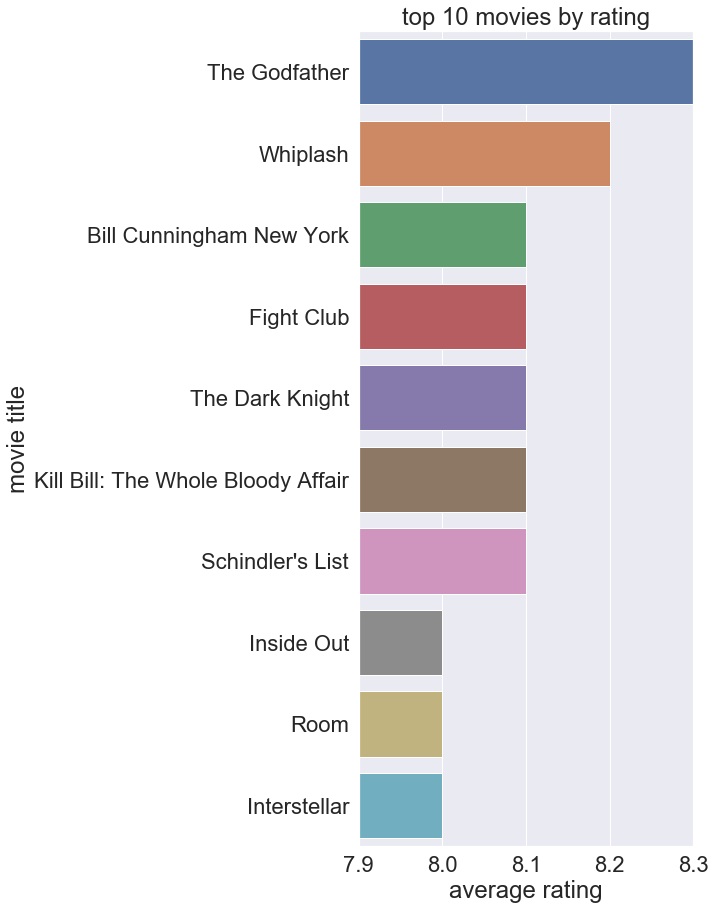

In [62]:
#plot
sns.set(style="whitegrid");
sns.set(font_scale=2);
f,ax = plt.subplots(figsize=(6,15));
ax= sns.barplot(x='vote_average',y='original_title', data=df_top);
ax.set(xlim=(7.9,8.3),ylabel='movie title',xlabel='average rating');
plt.title('top 10 movies by rating');

In [64]:
#obtain details of voting_average edge
df_movie.describe()['vote_average']

count    1992.000000
mean        6.178614
std         0.881955
min         2.100000
25%         5.600000
50%         6.200000
75%         6.800000
max         8.300000
Name: vote_average, dtype: float64

In [65]:
#add a column to store the range of the rating(low,medium,above average,high)
bin_edges = [2.1,5.6,6.2,6.8,8.3]
bin_names = ['Low','Medium','Above Average','High']
df_movie['movie_rating'] = pd.cut(df_movie['vote_average'], bin_edges , labels = bin_names)
df_movie.head()

,popularity,budget,revenue,original_title,cast,director,tagline,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,movie_rating
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,Above Average
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,High
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,Above Average
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,High
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,High


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

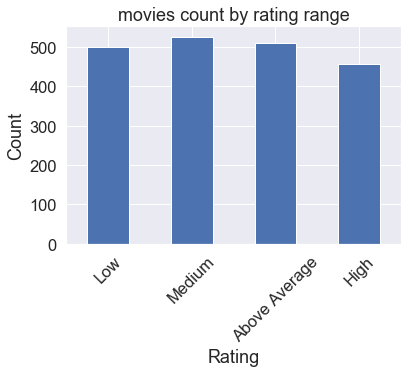

In [66]:
#plot the distribution
counts = df_movie.groupby('movie_rating').count()['genres']
sns.set_style('darkgrid')
sns.set(font_scale=1.5)
counts.plot(kind='bar' , title = 'movies count by rating range')
plt.xlabel('Rating',fontsize=18)
plt.ylabel('Count',fontsize=18)
plt.xticks(rotation=45)


### Question2: What are average popularities of movies according to their budget?

In [71]:
df_movie['budget'].describe()[4:8]

25%            0.0
50%     15000000.0
75%     48000000.0
max    425000000.0
Name: budget, dtype: float64

In [76]:
#create a new column for budget range using cut metohd of pandas
bin_edge = [0,15000000,48000000,425000000]
df_movie['budget_range'] = pd.cut(df_movie['budget'],bin_edge, labels = ['low','medium','high'])
df_movie.head(2)



,popularity,budget,revenue,original_title,cast,director,tagline,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,movie_rating,budget_range
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,Above Average,high
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,High,high


In [83]:
avg=df_movie.groupby('budget_range')['popularity'].mean()
avg

budget_range
low       0.887292
medium    1.393622
high      2.643001
Name: popularity, dtype: float64

Text(0, 0.5, 'Popularity')

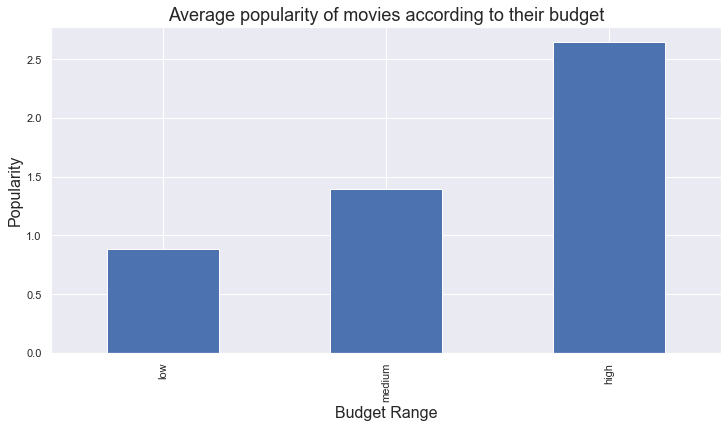

In [87]:
#plot the information
sns.set()
avg.plot(kind='bar',figsize=(12,6))
plt.title('Average popularity of movies according to their budget', fontsize=18)
plt.xlabel('Budget Range', fontsize=16)
plt.ylabel('Popularity',fontsize=16)


### Question3: In which year highest number of movies was produced and analyse it by decade?

Text(0, 0.5, 'Number of Movies')

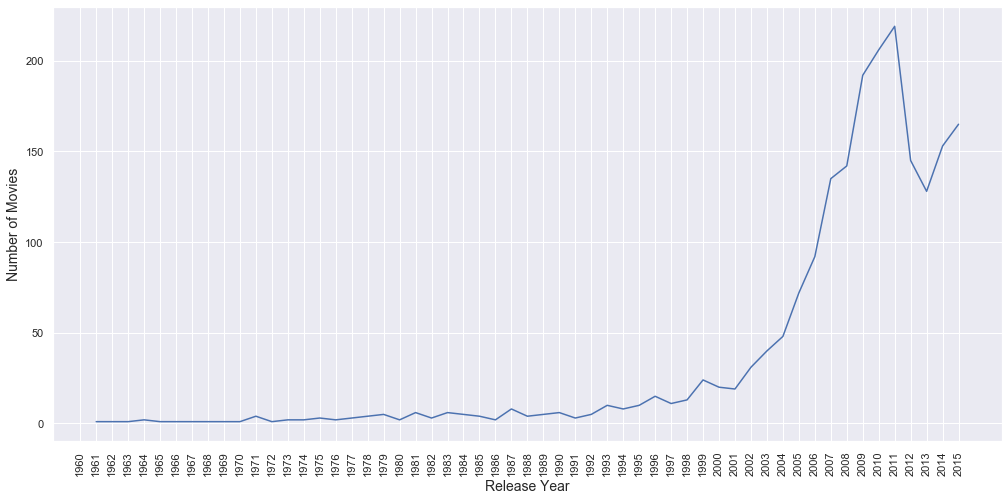

In [91]:
plot_l = pd.DataFrame(df_movie['release_year'].value_counts().reset_index().sort_values(by='index'))
plt.figure(figsize=(17,8))
plt.plot(plot_l['index'],plot_l['release_year'])
plt.xticks(np.arange(1960,2016,1), rotation=90)
plt.xlabel('Release Year',fontsize=14)
plt.ylabel('Number of Movies',fontsize=14)

Text(0, 0.5, 'Number of Movies')

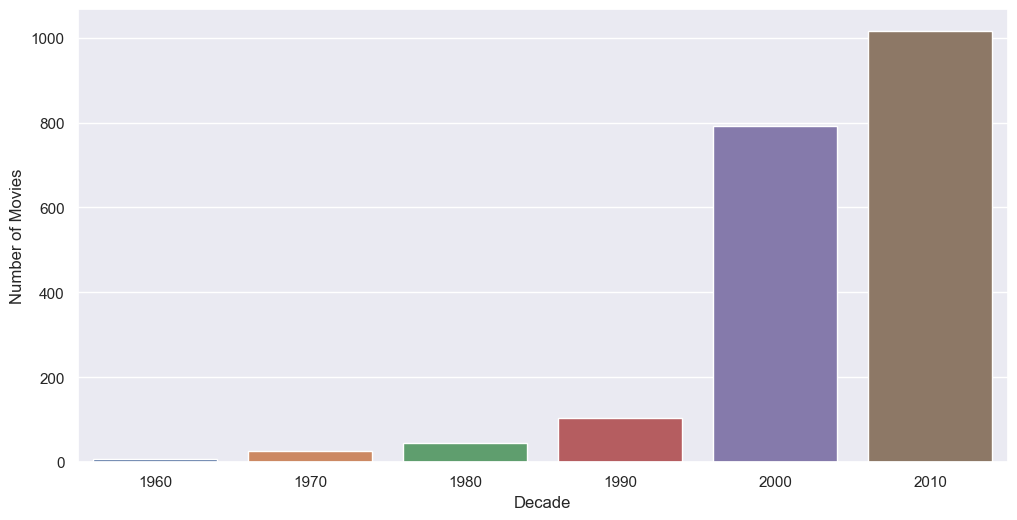

In [95]:
#visualise it by the decade
df_movie['decade']= df_movie['release_year'].apply(lambda x:(x//10)*10)
plt.figure(figsize=(12,6),dpi=100)
sns.countplot(df_movie['decade'])
plt.xlabel('Decade',fontsize=12)
plt.ylabel('Number of Movies',fontsize=12)

### Question 4: What is the profit trend from year to year and average runtime of movies over year?

In [103]:
#profit trend
df_movie.insert(3,'profit_loss',df_movie['revenue']-df_movie['budget'])
df_movie.head(2)

,popularity,budget,revenue,profit_loss,Profit_Loss,original_title,cast,director,tagline,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,movie_rating,budget_range,decade
0,32.985763,150000000,1513528810,1363528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,Above Average,high,2010
1,28.419936,150000000,378436354,228436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,High,high,2010


Text(0, 0.5, 'Profit')

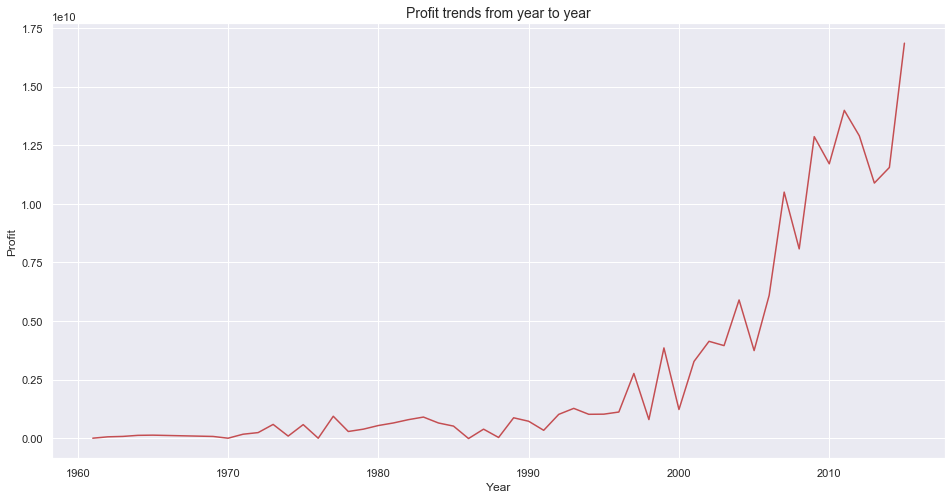

In [102]:
df_movie.groupby('release_year')['profit_loss'].sum().plot(kind='line', figsize=(16,8),color='r')
plt.title('Profit trends from year to year',fontsize=14)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Profit',fontsize=12)

Text(0, 0.5, 'Runtime')

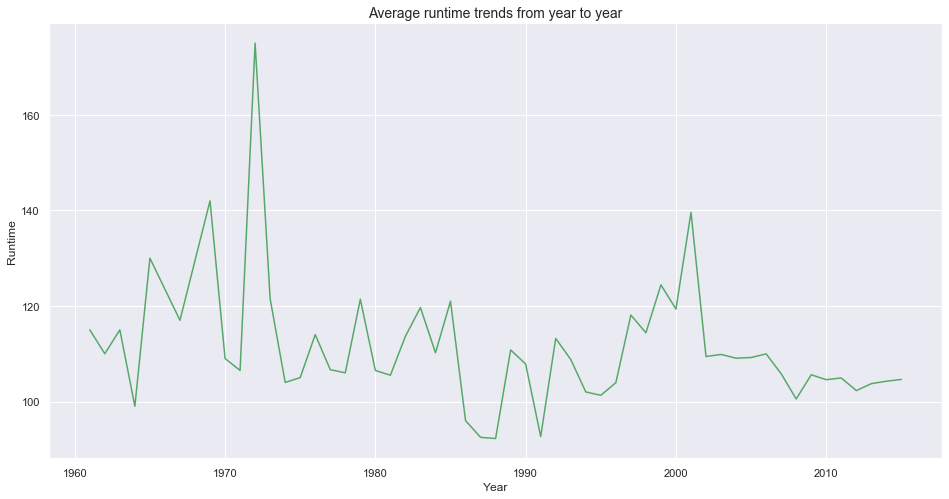

In [105]:
#average runtime of movies over years
df_movie.groupby('release_year')['runtime'].mean().plot(kind='line', figsize=(16,8),color='g')
plt.title('Average runtime trends from year to year',fontsize=14)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Runtime',fontsize=12)


In [123]:
def calc(cols):
    data = df_movie[cols].str.cat(sep='|')
    data = pd.Series(data.split('|'))
    count = data.value_counts(ascending = False)
    return count

In [124]:
#genres
count= calc('genres')
count.head(2)

Drama     838
Comedy    640
dtype: int64

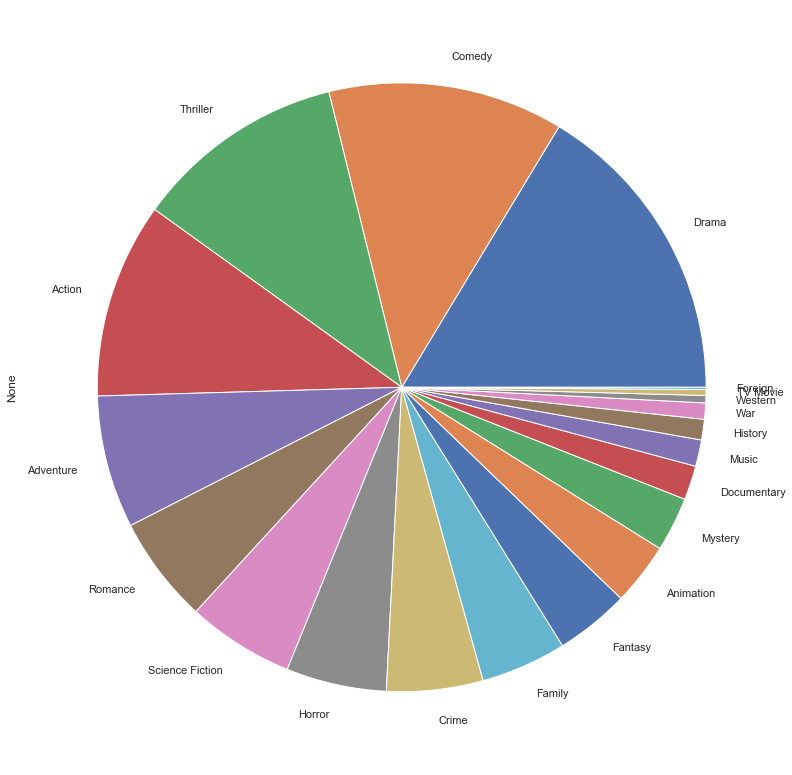

In [125]:
count.plot(kind='pie',figsize=(14,14))

In [131]:
#cast
count= calc('cast')
count.head()

Matt Damon           23
Mark Wahlberg        20
Samuel L. Jackson    20
Ryan Reynolds        19
Robert Downey Jr.    17
dtype: int64

In [132]:
#director
count= calc('director')
count.head()

John Carpenter       18
Steven Spielberg     11
Steven Soderbergh    11
Robert Zemeckis       8
Clint Eastwood        8
dtype: int64

In [133]:
#production company
count= calc('production_companies')
count.head()

Universal Pictures    134
Warner Bros.          126
Columbia Pictures      85
Paramount Pictures     76
Relativity Media       70
dtype: int64

In [130]:
#average budget
avg = df_movie['budget'].mean()
avg

34549235.94076305

#### Observations:


1.1: The top rated movie is The Godfather with rating of 8.3

1.2: For the movie count by rating, the distribution is normal
2. Movies with higher budget tend to be more popular within the audience
3. 2011 and 1961 recorded the highest and lowest number of movies released respectively and the number of movie releasing per 
   year has increased.
   
4.1: Profit trend has increased exponentially especially after 21st century.

4.2: The runtime of movies have decreased over the years, with a hike in 1970s and currently as an average of 110 minutes.

#### Let's now look at some correlations:

Text(0, 0.5, 'Revenue')

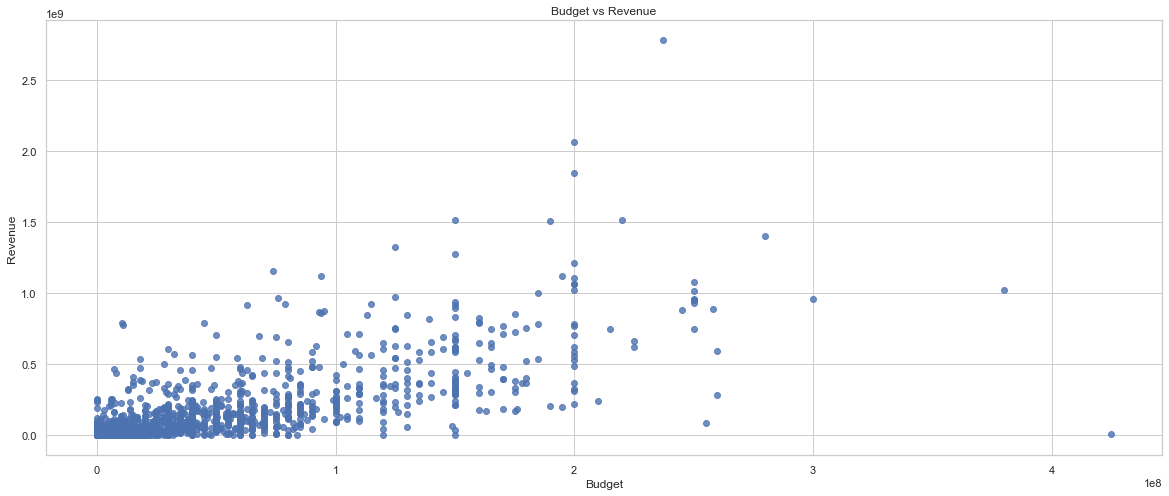

In [122]:
sns.regplot(x = df_movie['budget'],y=df_movie['revenue'], fit_reg=False)
fig_size = plt.rcParams['figure.figsize']
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams['figure.figsize'] = fig_size
plt.title('Budget vs Revenue' , fontsize=12)
plt.xlabel('Budget',fontsize=12)
plt.ylabel('Revenue',fontsize=12)

Text(0, 0.5, 'Popularity')

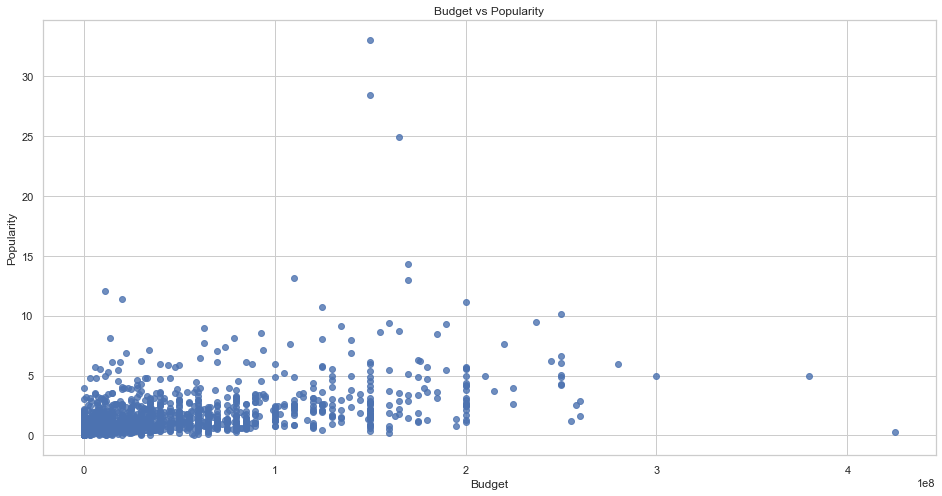

In [119]:
sns.regplot(x = df_movie['budget'],y=df_movie['popularity'], fit_reg=False)
fig_size = plt.rcParams['figure.figsize']
fig_size[0] = 16
fig_size[1] = 8
plt.rcParams['figure.figsize'] = fig_size
plt.title('Budget vs Popularity' , fontsize=12)
plt.xlabel('Budget',fontsize=12)
plt.ylabel('Popularity',fontsize=12)

Text(0, 0.5, 'Revenue')

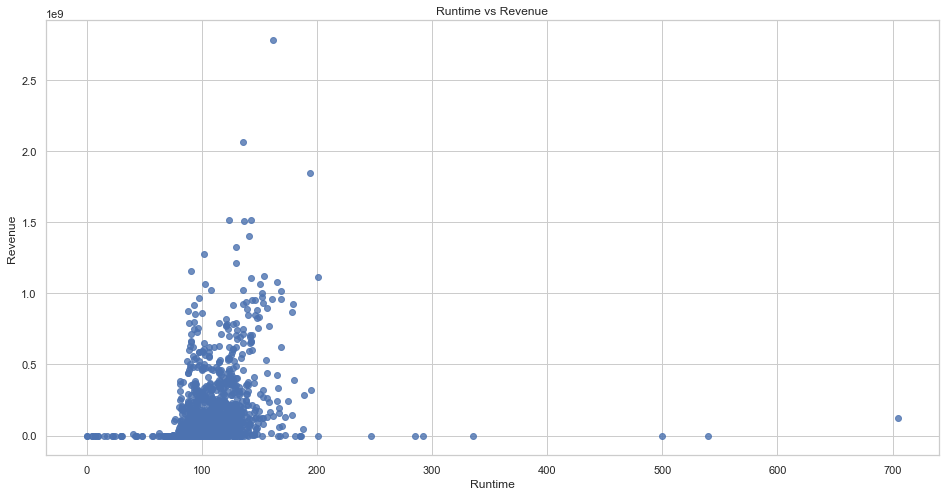

In [120]:
sns.regplot(x = df_movie['runtime'],y=df_movie['revenue'], fit_reg=False)
fig_size = plt.rcParams['figure.figsize']
fig_size[0] = 16
fig_size[1] = 8
plt.rcParams['figure.figsize'] = fig_size
plt.title('Runtime vs Revenue' , fontsize=12)
plt.xlabel('Runtime',fontsize=12)
plt.ylabel('Revenue',fontsize=12)

#### Concusions:

For a successful movie following suggestions can be implemented:
    1. The genre of movie should be drama/comedy/action/thriller.
    2. The cast should preferably include Matt Damon/Mark Wahlberg/ Samuel L. Jackson/Ryan Reynolds/Robert Downey Jr.
    3. The movie could be directed by any of John Carpenter/Steven Spielberg/Steven Soderbergh /Robert Zemeckis/Clint              
       Eastwood 
    4. The production company can be any of Universal Pictures/Warner Bros./Columbia Pictures/Paramount Pictures/Relativity        
       Media 
    5. The budget should be around $34549235.
    6. The runtime should be around 110 minutes.
    